Epoch 1/100


C:\Users\Vision\anaconda3\envs\soilenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.9960 - val_accuracy: 1.0000 - val_loss: 0.8088
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7500 - loss: 0.9440 - val_accuracy: 1.0000 - val_loss: 0.8561
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7500 - loss: 0.8950 - val_accuracy: 1.0000 - val_loss: 0.9102
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.7500 - loss: 0.8481 - val_accuracy: 1.0000 - val_loss: 0.9678
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7500 - loss: 0.8027 - val_accuracy: 0.0000e+00 - val_loss: 1.0286
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.7592 - val_accuracy: 0.0000e+00 - val_loss: 1.0931
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 1.0000 - loss: 0.7174 - val_accuracy: 0.0000e+00 - val_loss: 1.1594
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.6771 - val_accuracy: 0.0000e+00 - 

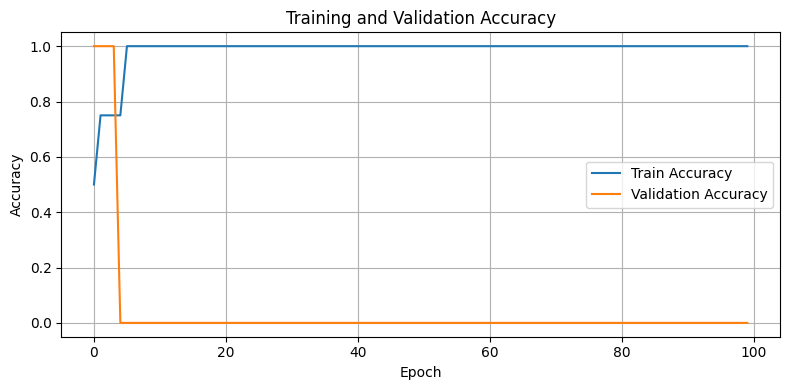

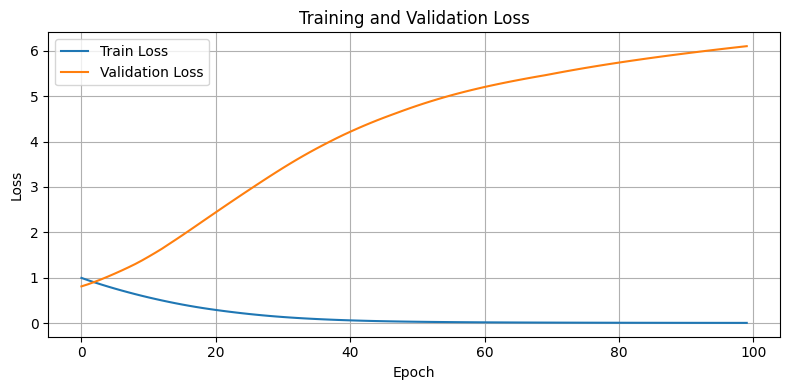

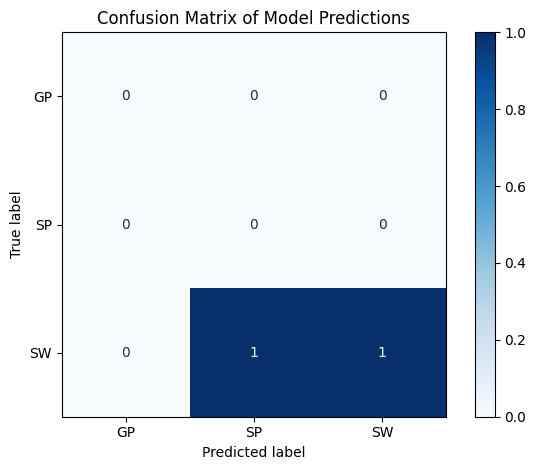

ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

In [1]:
# === IMPORTS ===
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# === DATA PREPARATION ===
soil_data = pd.DataFrame({
    'Gravel': [24.1, 9.8, 14.0, 7.5, 30.0, 15.0, 40.0],
    'Sand': [74.8, 89.1, 85.4, 91.6, 65.0, 80.0, 55.0],
    'Fines': [1.2, 1.0, 0.6, 0.9, 5.0, 4.5, 5.0],
    'D10': [0.22, 0.30, 0.20, 0.20, 0.15, 0.25, 0.10],
    'D30': [0.48, 0.50, 0.32, 0.40, 0.35, 0.45, 0.25],
    'D50': [0.90, 0.70, 0.60, 0.60, 0.50, 0.60, 0.40],
    'D60': [2.00, 1.00, 0.8, 0.90, 1.50, 1.80, 0.70],
    'Cu': [9.09, 3.33, 4.00, 4.50, 10.0, 7.2, 7.0],
    'Cc': [0.52, 0.83, 0.64, 0.89, 1.0, 1.1, 1.2],
    'Gs': [2.5, 2.7, 2.5, 2.5, 2.6, 2.65, 2.55],
    'USCS': ['SW', 'SW', 'SW', 'SW', 'SP', 'SP', 'GP']
})

# Encode the target labels
label_encoder = LabelEncoder()
soil_data['label'] = label_encoder.fit_transform(soil_data['USCS'])

# Features and target
X = soil_data.drop(['USCS', 'label'], axis=1)
y = soil_data['label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# === MODEL DEFINITION ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

# === EVALUATION ===
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict classes
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score on test data: {acc:.4f}")

# Decode predictions to original labels
decoded_preds = label_encoder.inverse_transform(y_pred)
print("Predicted classes:", decoded_preds)

# === PLOTTING ===

# 1. Training & Validation Accuracy plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Training & Validation Loss plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Confusion Matrix (for all classes)
all_labels = np.arange(len(label_encoder.classes_))
all_label_names = label_encoder.classes_

cm = confusion_matrix(y_test, y_pred, labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_label_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix of Model Predictions')
plt.tight_layout()
plt.show()

# 4. Classification report with Precision, Recall, F1-Score bar plot
report = classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()
metrics_to_plot = df_report.loc[label_encoder.classes_, ['precision', 'recall', 'f1-score']]

metrics_to_plot.plot(kind='bar', figsize=(8, 4))
plt.title('Class-wise Precision, Recall, and F1-Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


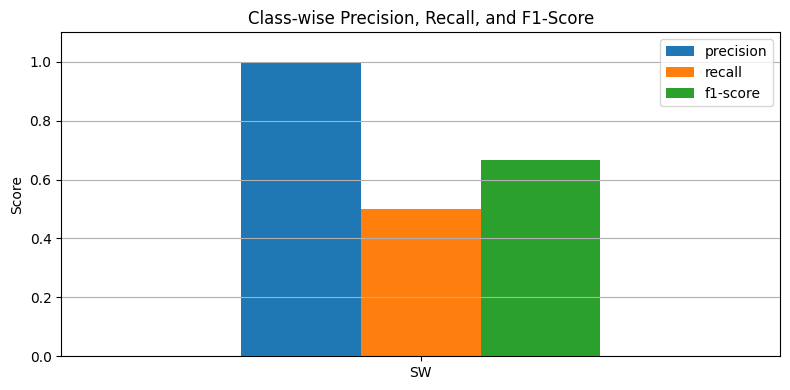

In [2]:
present_labels = np.unique(y_test)  # labels present in test data
present_label_names = label_encoder.inverse_transform(present_labels)

report = classification_report(
    y_test,
    y_pred,
    labels=present_labels,          # add this line
    target_names=present_label_names,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()
metrics_to_plot = df_report.loc[present_label_names, ['precision', 'recall', 'f1-score']]

metrics_to_plot.plot(kind='bar', figsize=(8, 4))
plt.title('Class-wise Precision, Recall, and F1-Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
